In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from heat_map import heatmap, annotate_heatmap
import pathlib

In [12]:
fpath = pathlib.Path(r"F:\device\optics\images\190618_100장\Desktop\100장\DSP_datasheet_20190619_152950\100장_8e10eed -  Quantitation Amplification Results.xlsx")

In [13]:
dye_li = ['FAM', 'HEX', 'Cal Red 610', 'Quasar 670', 'Quasar 705']

In [14]:
f_dic = pd.read_excel(fpath, sheet_name=None, index_col=0)
f_dic['FAM'].head()

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4
0_0_f,1265786,1008706,1242238,624479,1044147,1197206,1220123,478474,1020728,1156702,1178390,449989,1045264,770505,1028968,538566
0_1_f,1332037,1049105,1273602,643371,1068845,1221611,1243383,488595,1048905,1179970,1195235,455967,1077736,789496,1051018,550196
10_0_f,1450225,1070447,1294786,650155,1087156,1253996,1274189,501153,1054068,1181651,1207084,465061,1060207,775030,1040081,543005
10_1_f,1432783,1062209,1290880,647782,1092938,1270439,1300257,506585,1041695,1172558,1201950,464060,1074851,786635,1049551,546652
11_0_f,1443534,1068845,1302905,656821,1082977,1255790,1298059,505780,1051670,1183490,1220878,471974,1069786,779784,1044557,543256


In [15]:
df = f_dic['FAM'].sort_index().dropna(axis=1)
df.head()

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4
0_0_f,1265786,1008706,1242238,624479,1044147,1197206,1220123,478474,1020728,1156702,1178390,449989,1045264,770505,1028968,538566
0_1_f,1332037,1049105,1273602,643371,1068845,1221611,1243383,488595,1048905,1179970,1195235,455967,1077736,789496,1051018,550196
10_0_f,1450225,1070447,1294786,650155,1087156,1253996,1274189,501153,1054068,1181651,1207084,465061,1060207,775030,1040081,543005
10_1_f,1432783,1062209,1290880,647782,1092938,1270439,1300257,506585,1041695,1172558,1201950,464060,1074851,786635,1049551,546652
11_0_f,1443534,1068845,1302905,656821,1082977,1255790,1298059,505780,1051670,1183490,1220878,471974,1069786,779784,1044557,543256


In [16]:
df.mean()

A1    1409105.615
A2    1102761.715
A3    1268835.115
A4     633045.510
B1    1040066.570
B2    1226888.250
B3    1276626.205
B4     492844.125
C1    1015313.705
C2    1145149.380
C3    1177944.240
C4     454029.545
D1    1055233.270
D2     769549.055
D3    1021296.500
D4     531130.415
dtype: float64

In [17]:
df.mean()['A1']

1409105.615

In [18]:
row_li = list('ABCD')
col_li = list(range(1, 5))

In [19]:
for i in range(5):
    print(divmod(i, 2))

(0, 0)
(0, 1)
(1, 0)
(1, 1)
(2, 0)


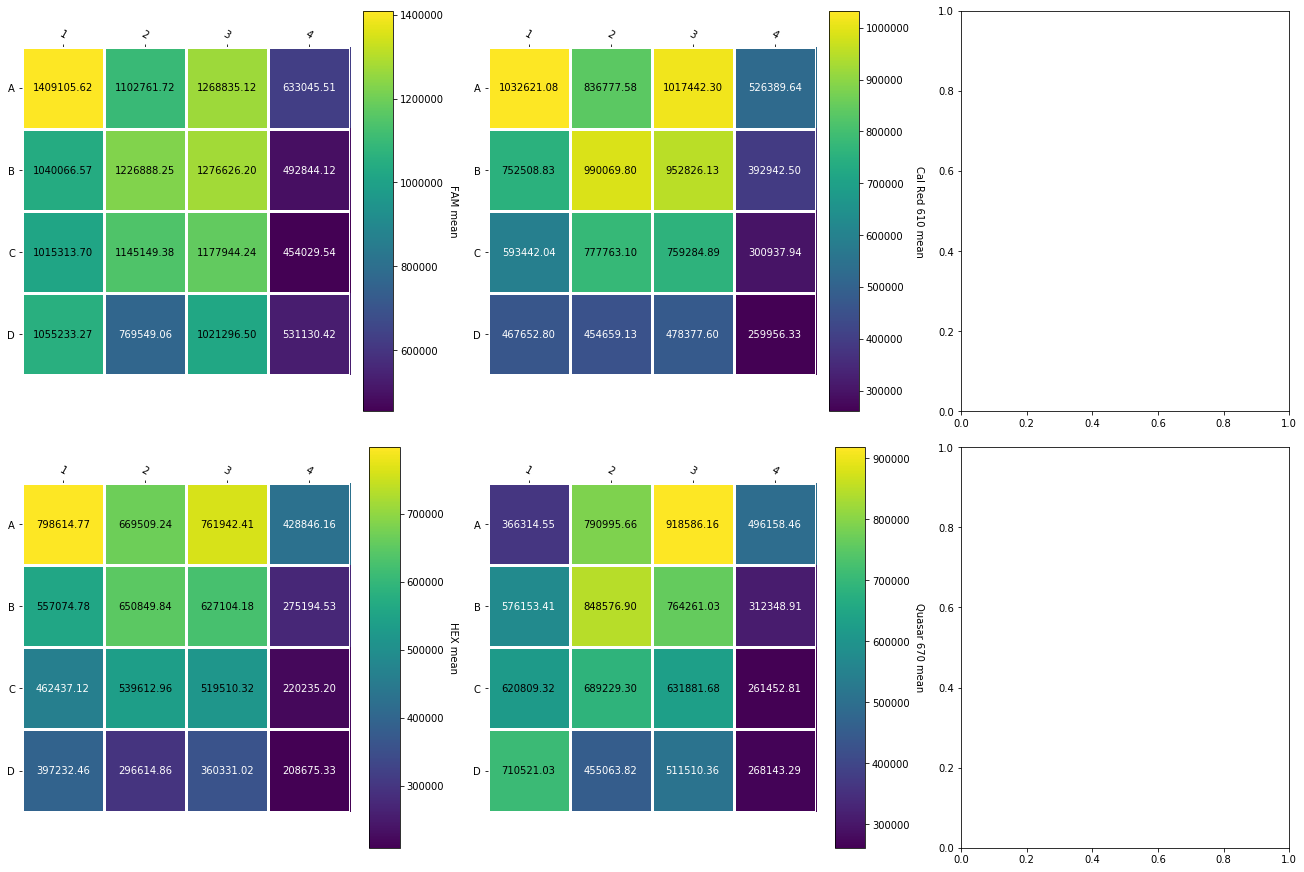

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)
for ind, dye in enumerate(dye_li):
    i, j = divmod(ind, 2)
    try:
        df = f_dic[dye].sort_index().dropna(axis=1)
        mean_dic = df.mean()
        table_cell = []
        for r in row_li:
            _li = []
            for c in col_li:
                try:
                    _li.append(round(mean_dic[r+str(c)], 2))
                except KeyError:
                    _li.append('')
            table_cell.append(_li)
        table_arr = np.array(table_cell)
        im, cbar = heatmap(table_arr, row_li, col_li, ax=ax[j, i],
                           cbarlabel=f'{dye} mean')
        annotate_heatmap(im, textcolors=['white', 'black'])
    except KeyError:
        pass
plt.savefig("190619_mean_by_channel.png")

In [21]:
df.divide(df.mean(axis=1), axis=0).mean()

A1    0.634969
A2    1.372017
A3    1.593720
A4    0.860897
B1    0.999531
B2    1.472354
B3    1.325868
B4    0.541936
C1    1.077321
C2    1.196033
C3    1.096240
C4    0.453591
D1    1.233154
D2    0.789632
D3    0.887412
D4    0.465325
dtype: float64

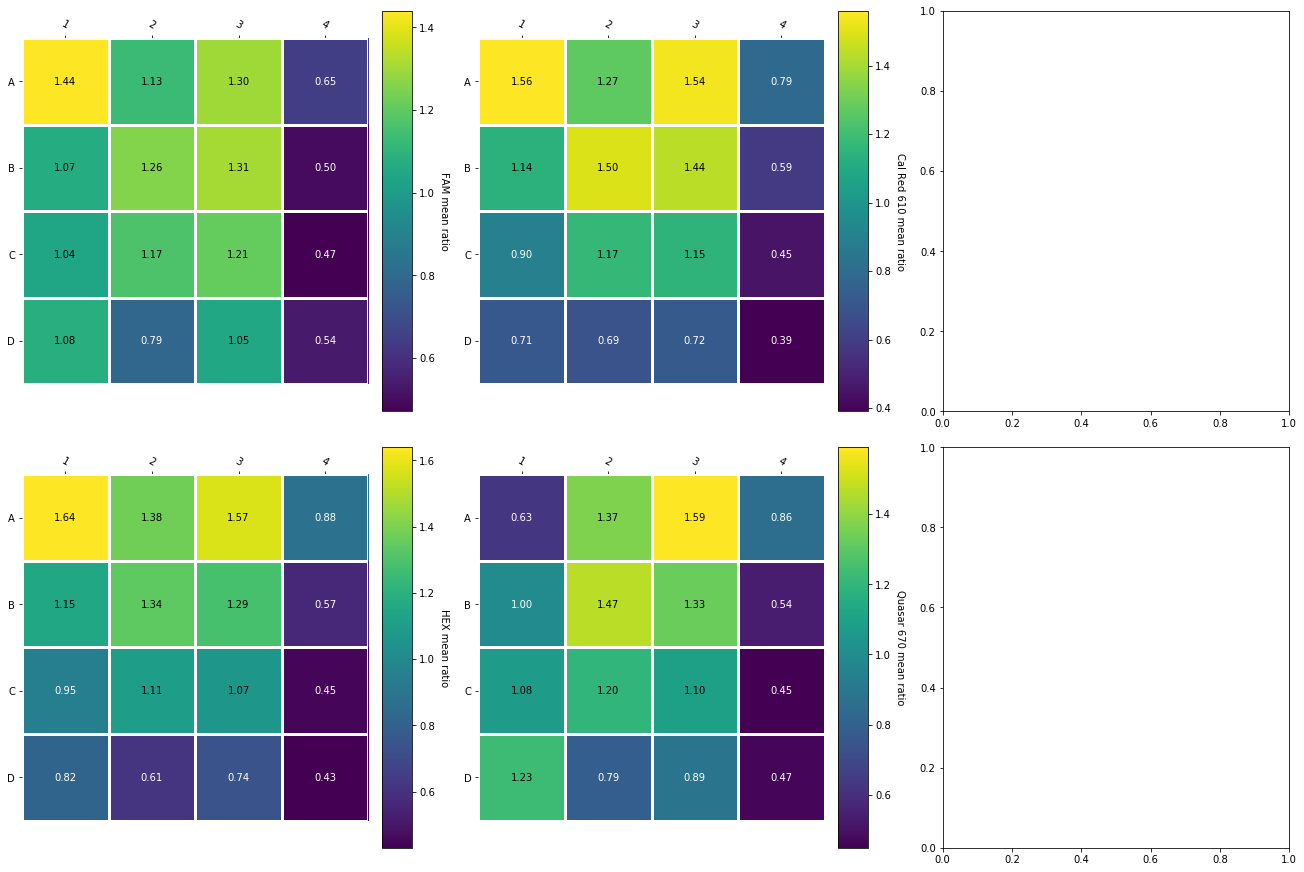

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)
for ind, dye in enumerate(dye_li):
    i, j = divmod(ind, 2)
    try:
        df = f_dic[dye].sort_index().dropna(axis=1)
        mean_dic = df.divide(df.mean(axis=1), axis=0).mean()
        table_cell = []
        for r in row_li:
            _li = []
            for c in col_li:
                try:
                    _li.append(round(mean_dic[r+str(c)], 2))
                except KeyError:
                    _li.append('')
            table_cell.append(_li)
        table_arr = np.array(table_cell)
        im, cbar = heatmap(table_arr, row_li, col_li, ax=ax[j, i],
                           cbarlabel=f'{dye} mean ratio')
        annotate_heatmap(im, textcolors=['white', 'black'])
    except KeyError:
        pass
plt.savefig("190619_mean_ratio_by_channel.png")

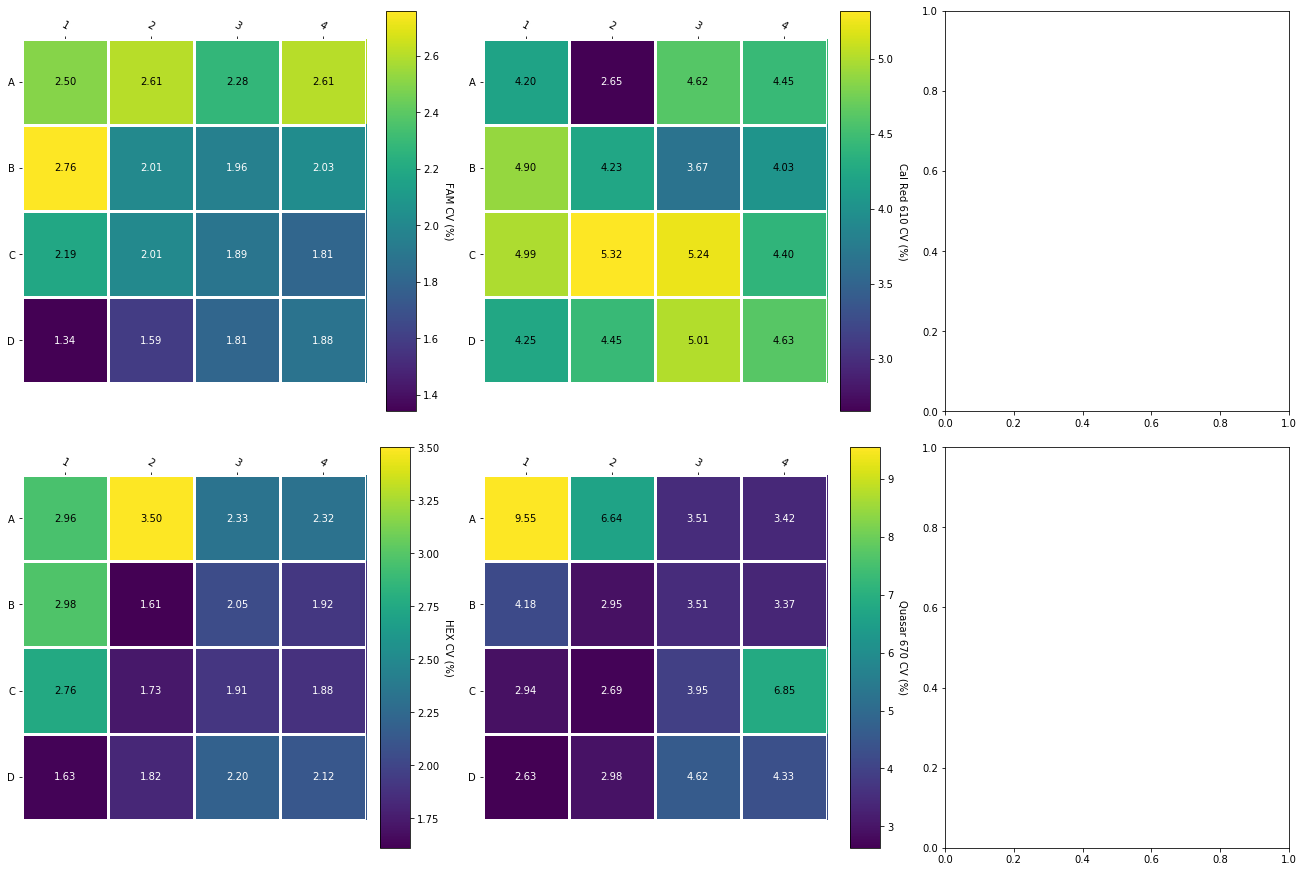

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)
for ind, dye in enumerate(dye_li):
    i, j = divmod(ind, 2)
    try:
        df = f_dic[dye].sort_index().dropna(axis=1)
        mean_dic = df.std()/df.mean()*100
        table_cell = []
        for r in row_li:
            _li = []
            for c in col_li:
                try:
                    _li.append(round(mean_dic[r+str(c)], 2))
                except KeyError:
                    _li.append('')
            table_cell.append(_li)
        table_arr = np.array(table_cell)
        im, cbar = heatmap(table_arr, row_li, col_li, ax=ax[j, i],
                           cbarlabel=f'{dye} CV (%)')
        annotate_heatmap(im, textcolors=['white', 'black'])
    except KeyError:
        pass
plt.savefig("190619_cv_by_channel.png")